In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [3]:
contamination = 0.15  # percentage of outliers
n_train = 1000  # number of training points
n_test = 200   # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [4]:
# Training an IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# Get prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# Get prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


In [5]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
IForest ROC:0.9962, precision @ rank n:0.9867

On Test Data:
IForest ROC:1.0, precision @ rank n:1.0


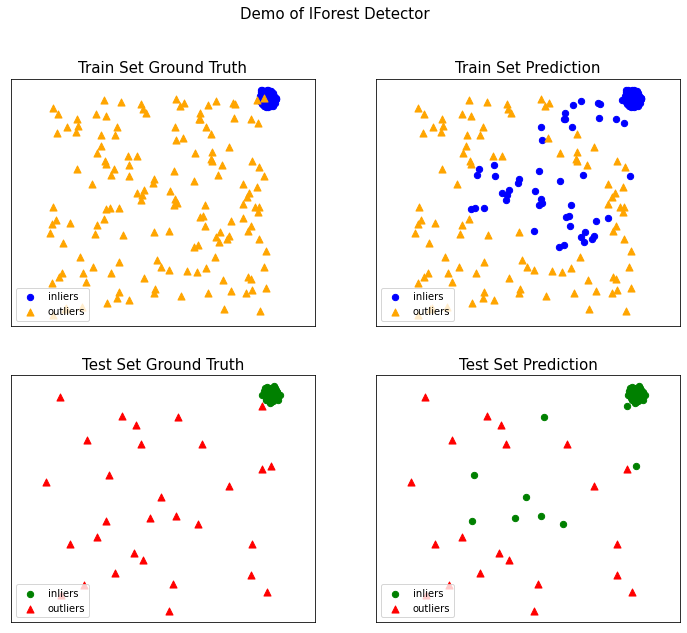

In [6]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)